Config = {'layer_specs': [784, 50, 50, 10], 'activation': 'tanh', 'learning_rate': 0.01, 'batch_size': 128, 'epochs': 100, 'early_stop': True, 'early_stop_epoch': 5, 'L2_penalty': 0, 'momentum': True, 'momentum_gamma': 0.99}
Shape of x_train = (60000, 784), y_train = (60000, 10)
Shape of x_train = (48000, 784)
Shape of y_train = (48000, 10)
Shape of x_valid = (12000, 784)
Shape of y_valid = (12000, 10)
train: Epoch = 0, training loss = 58.66199425957481, training acc = 0.27245833333333336,         validation loss = 7.279613126076694, validation acc = 0.3580833333333333
train: Epoch = 1, training loss = 3.3293402123632756, training acc = 0.2698333333333333,         validation loss = 2.413377606662257, validation acc = 0.2085
train: Epoch = 2, training loss = 2.3317548529375527, training acc = 0.11539583333333334,         validation loss = 2.3080633674704276, validation acc = 0.10583333333333333
train: Epoch = 3, training loss = 2.306755949330194, training acc = 0.1010625,         valida

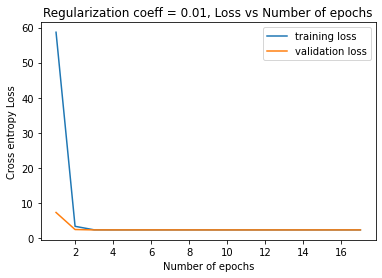

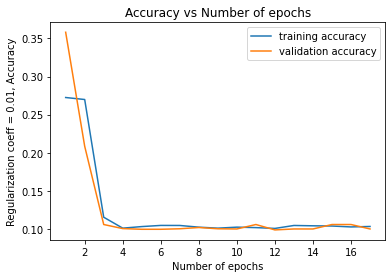

Test accuracy is 0.1
Shape of x_train = (60000, 784), y_train = (60000, 10)
Shape of x_train = (48000, 784)
Shape of y_train = (48000, 10)
Shape of x_valid = (12000, 784)
Shape of y_valid = (12000, 10)
train: Epoch = 0, training loss = 22.049656778201353, training acc = 0.3093958333333333,         validation loss = 13.660177616537641, validation acc = 0.52225
train: Epoch = 1, training loss = 9.262789330105658, training acc = 0.584125,         validation loss = 6.149497458781582, validation acc = 0.609
train: Epoch = 2, training loss = 4.433999715524574, training acc = 0.6451041666666667,         validation loss = 3.1860577981875347, validation acc = 0.65425
train: Epoch = 3, training loss = 2.455748780973738, training acc = 0.6693958333333333,         validation loss = 1.9423275858305042, validation acc = 0.6680833333333334
train: Epoch = 4, training loss = 1.6268013167999762, training acc = 0.6851875,         validation loss = 1.4346577005389138, validation acc = 0.6761666666666667
t

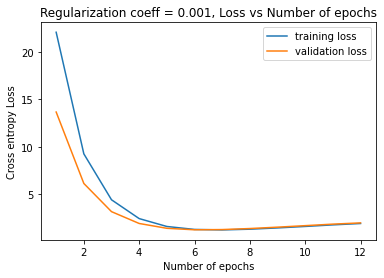

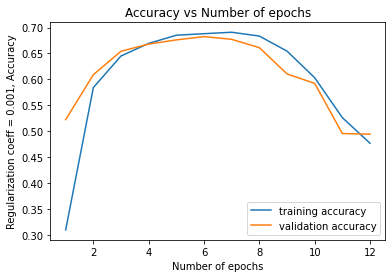

Test accuracy is 0.4933
Shape of x_train = (60000, 784), y_train = (60000, 10)
Shape of x_train = (48000, 784)
Shape of y_train = (48000, 10)
Shape of x_valid = (12000, 784)
Shape of y_valid = (12000, 10)
train: Epoch = 0, training loss = 7.807206062982555, training acc = 0.29022916666666665,         validation loss = 4.666544620403539, validation acc = 0.48041666666666666
train: Epoch = 1, training loss = 3.8399857180652064, training acc = 0.5352291666666666,         validation loss = 3.447273884122645, validation acc = 0.5444166666666667
train: Epoch = 2, training loss = 3.081027505127845, training acc = 0.5894375,         validation loss = 2.962292979141024, validation acc = 0.57975
train: Epoch = 3, training loss = 2.7496587200753426, training acc = 0.6205625,         validation loss = 2.712327802113039, validation acc = 0.6016666666666667
train: Epoch = 4, training loss = 2.5489610566778618, training acc = 0.6359583333333333,         validation loss = 2.5473274672577855, validatio

train: Epoch = 50, training loss = 0.7792736683854025, training acc = 0.7420208333333334,         validation loss = 0.8186734374402609, validation acc = 0.7274166666666667
train: Epoch = 51, training loss = 0.7666052377613075, training acc = 0.7471666666666666,         validation loss = 0.8105595693967032, validation acc = 0.7284166666666667
train: Epoch = 52, training loss = 0.7640489403187555, training acc = 0.7469166666666667,         validation loss = 0.8008836564826114, validation acc = 0.7316666666666667
train: Epoch = 53, training loss = 0.7479086538972858, training acc = 0.7544166666666666,         validation loss = 0.7951732829177984, validation acc = 0.7301666666666666
train: Epoch = 54, training loss = 0.7524688256153808, training acc = 0.7505,         validation loss = 0.7889217550645231, validation acc = 0.7313333333333333
train: Epoch = 55, training loss = 0.736641119851068, training acc = 0.7589791666666666,         validation loss = 0.7808922051158921, validation acc = 

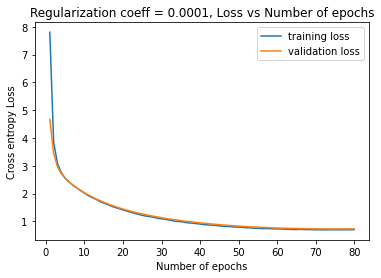

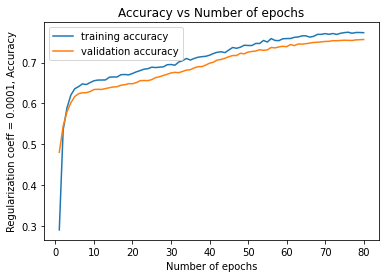

Test accuracy is 0.7443


In [2]:
################################################################################
# CSE 251B: Programming Assignment 2
# Winter 2021
################################################################################
# To install PyYaml, refer to the instructions for your system:
# https://pyyaml.org/wiki/PyYAMLDocumentation
################################################################################
# If you don't have NumPy installed, please use the instructions here:
# https://scipy.org/install.html
################################################################################

import os, gzip
import yaml
import numpy as np
import random
from collections import defaultdict
import matplotlib.pyplot as plt

# Thus, we could load the configuration file from the given path
def load_config(path):
    """
    Load the configuration from config.yaml.
    """
    return yaml.load(open('config.yaml', 'r'), Loader=yaml.SafeLoader)

# Here, we normalize the samples in the given dataset
def normalize_data(inp):
    """
        TODO: Normalize your inputs here to have 0 mean and unit variance.
    """
    normalized_inp = (inp - np.mean(inp,axis=0))/inp.std(axis=0)
    return normalized_inp

# Thus, we could compute the one hot encoding of the given dataset
def one_hot_encoding(labels, num_classes=10):
    """
        TODO: Encode labels using one hot encoding and return them.
    """
    numSamples = labels.shape[0]
    Labels = np.zeros(shape=(numSamples, num_classes))
    for i in range(numSamples):
        Labels[i,labels[i]] = 1
    return Labels

def load_data(path, mode='train'):
    """
        Load Fashion MNIST data.
        Use mode='train' for train and mode='t10k' for test.
    """

    labels_path = os.path.join(path, f'{mode}-labels-idx1-ubyte.gz')
    images_path = os.path.join(path, f'{mode}-images-idx3-ubyte.gz')

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8, offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8, offset=16).reshape(len(labels), 784)

    normalized_images = normalize_data(images)
    one_hot_labels    = one_hot_encoding(labels, num_classes=10)

    return normalized_images, one_hot_labels


def softmax(x):
    """
    TODO: Implement the softmax function here.
    Remember to take care of the overflow condition.
    """
    numerator = np.exp(x - np.max(x, axis=1, keepdims=True))
    denominator = np.sum(numerator, axis=1, keepdims=True)
    return numerator/denominator


class Activation():
    """
    The class implements different types of activation functions for
    your neural network layers.

    Example (for sigmoid):
        >>> sigmoid_layer = Activation("sigmoid")
        >>> z = sigmoid_layer(a)
        >>> gradient = sigmoid_layer.backward(delta=1.0)
    """
    def __init__(self, activation_type = "sigmoid"):
        """
            TODO: Initialize activation type and placeholders here.
        """
        if activation_type not in ["sigmoid", "tanh", "ReLU", "leakyReLU"]:
            raise NotImplementedError(f"{activation_type} is not implemented.")

        # Type of non-linear activation.
        self.activation_type = activation_type

        # Placeholder for input. This will be used for computing gradients.
        self.x = None
        
        # Cache the output computed here, it's easier to compute the gradient using this.
        self.activation_result = None
        
    def show(self):
        print("Layer = {}".format(self.activation_type))

    def __call__(self, a):
        '''
            This method allows your instances to be callable.
        '''
        return self.forward(a)

    def forward(self, a):
        '''
            Compute the forward pass gradients
        '''
        if self.activation_type == "sigmoid":
            return self.sigmoid(a)
        
        elif self.activation_type == "tanh":
            return self.tanh(a)
        
        elif self.activation_type == "ReLU":
            return self.ReLU(a)
        
        elif self.activation_type == "leakyReLU":
            return self.leakyReLU(a)

    def backward(self, delta):
        if self.activation_type == "sigmoid":
            grad = self.grad_sigmoid()

        elif self.activation_type == "tanh":
            grad = self.grad_tanh()

        elif self.activation_type == "ReLU":
            grad = self.grad_ReLU()
            
        elif self.activation_type == "leakyReLU":
            grad = self.grad_leakyReLU()
            
        return grad * delta

    def sigmoid(self, x):
        self.x = x
        self.activation_result = (1/(1 + np.exp(-1*x)))
        return self.activation_result

    def tanh(self, x):
        self.x = x
        self.activation_result = np.tanh(x)
        return self.activation_result

    def ReLU(self, x):
        self.x = x
        self.activation_result = np.maximum(0, x)
        return self.activation_result

    def leakyReLU(self, x):
        self.x = x
        self.activation_result = np.maximum(0.1*x, x)
        return self.activation_result

    def grad_sigmoid(self):
        return self.activation_result * (1 - self.activation_result)

    def grad_tanh(self):
        return (1 - (self.activation_result * self.activation_result))

    def grad_ReLU(self):
        return np.where(self.x > 0, 1, 0)

    def grad_leakyReLU(self):
        return np.where(self.x > 0, 1, 0.1)
        
class Layer():
    """
        This class implements Fully Connected layers for your neural network.

        Example:
            >>> fully_connected_layer = Layer(784, 100)
            >>> output = fully_connected_layer(input)
            >>> gradient = fully_connected_layer.backward(delta=1.0)
    """

    def __init__(self, in_units, out_units, debug_mode = False):
        """
            Define the architecture and create placeholder.
        """
        np.random.seed(42)
        self.w = np.random.randn(in_units, out_units)
        self.b = np.random.randn(1, out_units)
        
        self.x = None
        self.a = None

        self.d_x = None
        self.d_w = None
        self.d_b = None
        
        self.d_w_tminus1 = 0 # Don't initialize to d_w
        self.d_b_tminus1 = 0 # Don't initialize to d_b
        
        self.w_best = self.w # Used to store the best weights
        self.b_best = self.b # Used to store the best biases
        
        # Used by show()
        self.in_units = in_units
        self.out_units = out_units
        
    def show(self):
        """
            show() is used to display the details of the 
            Helpful for debugging
        """
        print("Input and output of the layer = {} and {}".format(self.in_units, self.out_units))
        
    def __call__(self, x):
        """
            Make layer callable.
        """
        return self.forward(x)

    def forward(self, x):
        """
            Compute the forward pass output here
            DO NOT apply activation here.
            Return self.a
        """
        self.x = x
        
        self.a = np.dot(x, self.w) + self.b
        return self.a

    def backward(self, delta, l2_penalty=0,debug_mode=False):
        """
            Backward pass code.
            Algo - This takes in gradient from its next layer as input,
            computes gradient for its weights and the delta to pass to its previous layers.
            Return self.dx
        """
        numSamples = self.x.shape[0]
        if(debug_mode):
            print("backward: Shape of delta = {}".format(delta.shape))
        self.d_x = 1*(np.dot(delta, self.w.transpose()) / (numSamples))
        self.d_w = 1*(np.dot(self.x.transpose(), delta) / (numSamples) - l2_penalty * self.w)
        self.d_b = 1*(np.sum(delta, axis=0) / (numSamples))
        
        return self.d_x
    
    def update_weights_biases(self, eta, weightIndex1, weightIndex2, biasIndex, isBias):
        """
            Compute the gradient using numerical approximation
            Args:
                epsilon = The amount by which we modify the weight
                weightLayer = The layer of the weight (originating layer)
                weightIndex1, weightIndex2 = Both indices required to compute the weight
                biasIndex - If this is a bias weight, what index should be used?
                isBias = Is it a bias weight or the synapse between two neurons?
        """
        # Perform forward pass with weights = w + epsilon
        if(isBias):
            self.b[0, biasIndex] += eta
        else:
            self.w[weightIndex1][weightIndex2] += eta
    
    def get_weights_biases(self, weightIndex1=0, weightIndex2=0, biasIndex=0, isBias=True):
        """
            Here, we could compute the values of weights and biases
            Args:
                weightIndex1, weightIndex2 = Both indices required to compute the weight
                biasIndex - If this is a bias weight, what index should be used?
                isBias = Is it a bias weight or the synapse between two neurons?
        """
        return self.w[weightIndex1][weightIndex2], self.b[0,biasIndex]
    
    def get_dw_db(self, weightIndex1=0, weightIndex2=0, biasIndex=0, isBias=True):
        """
            Getter method to return the values of the values and the variables
        """
        return self.d_w, self.d_b
        

    def modify_parameters(self, learning_rate, useMomentum=False, momentumGamma = 0.9):
        """
            This function is used to modify the parameters of a layer based on 
            learning rate, momentum if it's enabled
        """
        if useMomentum:
            delta_w = (learning_rate * self.d_w) + momentumGamma * self.d_w_tminus1
            delta_b = (learning_rate * self.d_b) + momentumGamma * self.d_b_tminus1
            
            self.w += delta_w
            self.b += delta_b
            
            self.d_w_tminus1 = delta_w
            self.d_b_tminus1 = delta_b
        else:
            self.w += learning_rate * self.d_w
            self.b += learning_rate * self.d_b
        
    def store_old_parameters(self):
        """
            Used to store the old parameters so that calculation of accurate delta
            is achieved when using momentum
        """
        self.w_best = self.w
        self.b_best = self.b
        
    def restore_old_parameters(self):
        """
            Restore the older parameters
        """
        self.w = self.w_best
        self.b = self.b_best
        
    
class Neuralnetwork():
    """
    Create a Neural Network specified by the input configuration.

    Example:
        >>> net = NeuralNetwork(config)
        >>> output = net(input)
        >>> net.backward()
    """

    def __init__(self, config, debug_mode=False):
        """
            Create the Neural Network using config.
        """
        self.layers = []             # Store all layers in this list.
        self.x = None                # Save the input to forward in this
        self.y = None                # Save the output vector of model in this
        self.targets = None          # Save the targets in forward in this variable
        self.l2_penalty = None       # L2 penalty required
        self.debug_mode = debug_mode # Used for debug prints
        # Add layers specified by layer_specs.
        for i in range(len(config['layer_specs']) - 1):
            self.layers.append(Layer(config['layer_specs'][i], config['layer_specs'][i+1]))
            if i < len(config['layer_specs']) - 2:
                self.layers.append(Activation(config['activation']))
        if(self.debug_mode):
            print(self.layers)

    def __call__(self, x, targets=None):
        """
            Make NeuralNetwork callable.
        """
        return self.forward(x, targets)

    def forward(self, x, targets=None, l2_penalty=0):
        """
            TODO: Compute forward pass through all the layers in the network and return it.
            If targets are provided, return loss as well.
        """
        self.x = x
        self.targets = targets
        
        prevLayer = x
        for layer in self.layers:
            if(self.debug_mode):
                print("Layer = ".format(layer.show()))
            prevLayer = layer.forward(prevLayer)
            
        # Computing y
        self.y = softmax(prevLayer)
        
        # Computing loss
        loss = self.loss(self.y, targets)
        
        if l2_penalty:
            for layer in self.layers:
                if (isinstance(layer, Layer)):
                    loss += 0.5 * l2_penalty * np.sum(layer.w ** 2)
        return loss

    def loss(self, logits, targets):
        '''
            TODO: compute the categorical cross-entropy loss and return it.
        '''
        numSamples = logits.shape[0]
        epsilon = 1e-30
        return -1 * np.sum(np.multiply(targets, np.log(logits + epsilon))) / numSamples
    
    def backward(self, l2_penalty=0):
        '''
            TODO: Implement backpropagation here.
            Call backward methods of individual layers.
        '''
        if(self.debug_mode):
            print("backward: shape of y = {}".format(self.y.shape))
        delta = (self.targets - self.y)/(self.y.shape[1])
        for layer in self.layers[::-1]:
            if(isinstance(layer, Layer)):
                delta = layer.backward(delta, l2_penalty)
            else:
                delta = layer.backward(delta)
    
    def modify_parameters(self, learningRate, useMomentum=False, momentumGamma=0.9):
        """
            This calls the modify parameters for each layer during the backward pass
        """
        for layer in self.layers[::-1]:
            if(isinstance(layer, Layer)):
                layer.modify_parameters(learningRate, useMomentum, momentumGamma)
    
    def store_old_parameters(self):
        """
            store all the parameters for all the layers
        """
        for layer in self.layers[::-1]:
            if(isinstance(layer, Layer)):
                layer.store_old_parameters()
    
    def restore_old_parameters(self):
        """
            Restore all the parameters back into self.w, self.b for all the layers
        """
        for layer in self.layers[::-1]:
            if(isinstance(layer, Layer)):
                layer.restore_old_parameters()
    
    def predict(self, x, y):
        """
            Given input dataset x, predict the outputs for x using the learned parameters
            After computing the learned parameters, compute the losses required
        """
        prevLayer = x
        for layer in self.layers:
            prevLayer = layer.forward(prevLayer)
        
        predictions = np.argmax(softmax(prevLayer), axis=1)
        targets = np.argmax(y, axis=1)
        return np.mean(targets == predictions)
    
    def update_weights_biases(self, eta, layerNumber, weightIndex1, \
                              weightIndex2, biasIndex, isBias=True):
        """
            Call weight and bias update for specific weights and biases in the network
        """
        layer = self.layers[layerNumber]
        if (isinstance(layer, Layer)):
            layer.update_weights_biases(eta, weightIndex1, weightIndex2, biasIndex, isBias)
    
    def get_weights_biases(self, layerNumber, weightIndex1, weightIndex2, \
                          biasIndex, isBias=True):
        """
            Here, we will compute the weights and biases for the network
        """
        layer = self.layers[layerNumber]
        w, b = None, None
        if (isinstance(layer, Layer)):
            w, b = layer.get_weights_biases(weightIndex1, weightIndex2, biasIndex, isBias)
        return w, b
    
    def get_dw_db(self, layerNumber, weightIndex1, weightIndex2, \
                          biasIndex, isBias=True):
        """
            Here, we will compute the weights and biases for the network
        """
        layer = self.layers[layerNumber]
        dw, db = None, None
        if (isinstance(layer, Layer)):
            dw, db = layer.get_dw_db(weightIndex1, weightIndex2, biasIndex, isBias)
        return dw, db

def miniBatchGenerator(x, y, batchSize, debug_mode = False):
    """
        A generator that's used to generate mini batches for the given dataset
        Inputs: x - dataset, y - targets, batchSize - Number of samples in each batch
        Generator function: Simply yields the values generated from x and y
    """
    if(debug_mode):
        print("Shape of x and y are {}, {}".format(x.shape, y.shape))
    new_data = np.zeros((x.shape[0], (x.shape[1] + y.shape[1])))
    for i in range(x.shape[0]):
        new_data[i][:-10] = x[i]
        new_data[i][-10:] = y[i]
    
    if(debug_mode):
        print("miniBatchGenerator: Shape of new_data = {}".format(new_data.shape))
    
    random.shuffle(new_data)
    
    numSets = int(x.shape[0] / batchSize) if (x.shape[0] % batchSize == 0) else int(x.shape[0] / batchSize) + 1
    
    if(debug_mode):
        print("miniBatchGenerator: x.shape = {}, new_data.shape = {}, Number of sets = {}, batchSize = {}".\
              format(x.shape, new_data.shape, numSets, batchSize))
    
    for i in range(numSets):
        startIdx, endIdx = i * batchSize, min((i+1) * batchSize, x.shape[0])
        if(debug_mode):
            print("startIdx = {}, endIdx = {}".format(startIdx, endIdx))
        data, targets = new_data[startIdx:endIdx, :-10], new_data[startIdx:endIdx, -10:]
        if(debug_mode):
            print("Shape of data, targets are {} and {}".format(data.shape, targets.shape))
        yield data, targets
        
def train(model, x_train, y_train, x_valid, y_valid, config):
    """
        TODO: Train your model here.
        Implement batch SGD to train the model.
        Implement Early Stopping.
        Use config to set parameters for training like learning rate, momentum, etc.
    """
    # Parse configurational settings
    numEpochs = config['epochs']
    earlyStopping = config['early_stop']
    useMomentum = config['momentum']
    L2Penalty = config['L2_penalty']
    momentumGamma = config['momentum_gamma']
    batchSize = config['batch_size']
    learningRate = config['learning_rate']
    earlyStop = config['early_stop']
    earlyStopEpoch = config['early_stop_epoch']
    #debug_mode = config['debug_mode']
    debug_mode = False
    # Variables for early stopping
    minValidationLoss = float('inf')
    currentIncreasingEpoch = 0
    
    # Results dict
    results = defaultdict(list)
    
    for epoch in range(numEpochs):
        trainLosses, trainAcc = [], []
        # TODO: Here, we implement Mini Batch Gradient Descent
        for data, targets in miniBatchGenerator(x_train, y_train, batchSize):
            trainingLoss = model.forward(data, targets, L2Penalty)
            trainLosses.append(trainingLoss)
            model.backward(l2_penalty=L2Penalty)
            model.modify_parameters(learningRate, useMomentum, momentumGamma)
            trainingAccuracy = model.predict(data, targets)
            trainAcc.append(trainingAccuracy)
            
        trainLoss = np.mean(np.array(trainLosses))
        trainAcc = np.mean(np.array(trainAcc))
        validationLoss = model.forward(x_valid,y_valid, L2Penalty)
        validationAcc = model.predict(x_valid, y_valid)
        

        print("train: Epoch = {}, training loss = {}, training acc = {}, \
        validation loss = {}, validation acc = {}".format(epoch, trainLoss, trainAcc, validationLoss, validationAcc))
        
        # Results dictionary contains a list of values for each epoch
        results['epoch'].append(epoch+1)
        results['trainloss'].append(trainLoss)
        results['trainAcc'].append(trainAcc)
        results['validationLoss'].append(validationLoss)
        results['validationAcc'].append(validationAcc)

        # Early stopping
        if validationLoss < minValidationLoss:
            model.store_old_parameters()
            minValidationLoss = validationLoss
            currentIncreasingEpoch = 0
        else:
            currentIncreasingEpoch += 1
        
        if earlyStop:
            if currentIncreasingEpoch > earlyStopEpoch:
                break
    
    return model, results

def test(model, X_test, y_test):
    """
        TODO: Calculate and return the accuracy on the test set.
    """
    return model.predict(X_test, y_test)

def load_q3b_data(x_train, y_train, debug_mode=True):
    """
        Loading the dataset for question 3(b)
        Args:
            x_train - X (60000 x 784 values)
            y_train - Y (1 x 10 values)
        Returns:
            x_small - subset of x_train
            y_small - subset of y_train
    """
    x_small, y_small = [], []

    sample_indices = [0] * 10
    for i in range(10):
        for j in range(x_train.shape[0]):
            if(y_train[j][i] == 1):
                sample_indices[i] = j
                # x_small, y_small results in the following values
                x_small.append(x_train[j])
                y_small.append(y_train[j])
                if(debug_mode):
                    print("For sample type {}, index = {}".format(i, j))
                break
    
    return np.array(x_small), np.array(y_small)

def validation_split(x, y, debug_mode=False):
    """
        Computes a 20% split after performing a random shuffle
    """
    new_data = np.zeros((x.shape[0], (x.shape[1] + y.shape[1])))
    if(debug_mode):
        print("Shape of new_data = {}".format(new_data.shape))
    for i in range(x.shape[0]):
        new_data[i][:-10] = x[i]
        new_data[i][-10:] = y[i]
    
    random.shuffle(new_data)
    length = len(new_data)
    split = int(length * 0.8)
    x_train = new_data[:split, : -10]
    y_train = new_data[:split,-10:]
    x_valid = new_data[split:,:-10]
    y_valid = new_data[split:,-10:]
    
    return (x_train, y_train, x_valid, y_valid)


if __name__ == "__main__":
    # Load the configuration file here
    config = load_config("./")
    print("Config = {}".format(config))

    # enable or disable the value for debug mode
    debug_mode = False

    # When this is set, only 3(b) results would be computed
    run_q3b = False

    # eta is used to update the weights. We use the value of eta computed here
    eta = 0.01
    
    L2Pen = [0.01, 0.001, 0.0001]
    
    L2Penalty = config['L2_penalty']
    # setting the value of L2Penalty
    learningRate = config['learning_rate']
    # setting useMomentum flag
    useMomentum = config['momentum']
    # Value of momentumGamma is set here
    momentumGamma = config['momentum_gamma']
    # Here, we compute the values of different epochs in the neural network
    
    for l2Pen in L2Pen:
        config['epochs'] = 110
        config['L2_penalty'] = l2Pen
        model  = Neuralnetwork(config, debug_mode)
        # Load the data
        x_train, y_train = load_data(path="C:\\Users\\ramasarma\\Documents\\UCSD\\Winter2021\\CSE251B\\Assignment2\\PA2\\", mode="train")
        x_test,  y_test  = load_data(path="C:\\Users\\ramasarma\\Documents\\UCSD\\Winter2021\\CSE251B\\Assignment2\\PA2\\", mode="t10k")
        print("Shape of x_train = {}, y_train = {}".format(x_train.shape, y_train.shape))

        if(run_q3b == False):
            x_train, y_train, x_valid, y_valid = validation_split(x_train, y_train, debug_mode)
            print("Shape of x_train = {}".format(x_train.shape))
            print("Shape of y_train = {}".format(y_train.shape))
            print("Shape of x_valid = {}".format(x_valid.shape))
            print("Shape of y_valid = {}".format(y_valid.shape))
        else:
            x_small, y_small = load_q3b_data(x_train, y_train)
            print("Shape of x_small = {} and y_small = {}".format(x_small.shape, y_small.shape))

        if(run_q3b == False):
            # TODO: train the model
            model, results = train(model, x_train, y_train, x_valid, y_valid, config)

            # Restoring the best weights for the network
            model.restore_old_parameters()

            # Epoch values
            epochList = results['epoch']
            trainLossList = results['trainloss']
            trainAccList = results['trainAcc']
            validationLossList = results['validationLoss']
            validationAccList = results['validationAcc']

            plt.plot(epochList, trainLossList)
            plt.plot(epochList, validationLossList)
            plt.legend(["training loss", "validation loss"])
            plt.xlabel('Number of epochs')
            plt.ylabel('Cross entropy Loss')
            plt.title("Regularization coeff = {}, Loss vs Number of epochs".format(l2Pen))
            plt.show()

            plt.plot(epochList, trainAccList)
            plt.plot(epochList, validationAccList)
            plt.title("Accuracy vs Number of epochs")
            plt.xlabel('Number of epochs')
            plt.ylabel('Regularization coeff = {}, Accuracy'.format(l2Pen))
            plt.legend(["training accuracy", "validation accuracy"])
            plt.show()

            # Compute the test accuracy
            testAcc = test(model, x_test, y_test)
            print("Test accuracy is {}".format(testAcc))
        else:
            weightIndices = [(0, 0), (0, 0), (0, 0), (2, 3), (4, 5), (11, 4), (5, 10)]
            biasIndices = [1, 1, 1, 0, 0, 0, 0]
            isBias = False
            for i in range(len(biasIndices)):
                if i < 2:
                    isBias = True
                else:
                    isBias = False
                weightIndex1, weightIndex2 = weightIndices[i][0], weightIndices[i][1]
                biasIndex = biasIndices[i]
                # layers are FC, Act, FC, Act, FC
                # Which amongst the following layers must be chosen?
                layerNumber = 0
                # First one should be at the softmax layer
                if i == 0:
                    layerNumber = 4
                elif i == 1:
                    layerNumber = 2
                elif i == 2:
                    layerNumber = 4
                elif (i == 3 or i == 4):
                    layerNumber = 4
                elif (i == 5 or i == 6):
                    layerNumber = 0

                # Update weights and biases for the given network
                model.update_weights_biases(eta, layerNumber, weightIndex1, weightIndex2, biasIndex, isBias)
                # Forward pass through the networks
                trainingLossPlusEta = model.forward(x_small, y_small, L2Penalty)
                model.update_weights_biases(-2*eta, layerNumber, weightIndex1, weightIndex2, biasIndex, isBias)
                trainingLossMinusEta = model.forward(x_small, y_small, L2Penalty)
                print("plus eta loss, minus eta loss = {}, {}".format(trainingLossPlusEta, trainingLossMinusEta))
                numericalDerivative = (trainingLossPlusEta - trainingLossMinusEta)/(2 * eta)

                # Reset the weights and biases to the original state
                model.update_weights_biases(eta, layerNumber, weightIndex1, weightIndex2, biasIndex, isBias)

                trainingLossBackProp = model.forward(x_small, y_small, L2Penalty)
                model.backward(l2_penalty=L2Penalty)
                model.modify_parameters(learningRate, useMomentum, momentumGamma)

                dw, db = model.get_dw_db(layerNumber, weightIndex1, weightIndex2, biasIndex, isBias)
                #print("Shapes of dw and db are {} and {}".format(dw.shape, db.shape))

                if(isBias):
                    print("At index = {}, numericalDerivative, backPropDerivative are {}, {}".\
                          format(i, numericalDerivative, np.sum(db[biasIndex], axis=0)))
                else:
                    print("At index = {}, numericalDerivative, backPropDerivative are {}, {}".\
                          format(i, numericalDerivative, dw[weightIndex1][weightIndex2]))